# Biodiversity Intactness Index Change in Phoenix Subdivision 
Author: Kristina Glass

Link to repository: https://github.com/kristinaglass/maricopa_county_biodiversity_index

# About

## Purpose

The purpose of this exploration is to find the changes in the Biodiversity Intactness Iddex around the Phoenex area from 2017 - 2020 [2](https://ai4edatasetspublicassets.blob.core.windows.net/assets/pdfs/io-biodiversity/Biodiversity_Intactness_whitepaper.pdf)

## Data Description

The datasets used include:
- [The Biodiversity STAC Collection accessed from the Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/dataset/io-biodiversity).
This dataset is build on pasts datasets of spatially referenced biodiversity observations 32,000 sites from over 750 studies. The two metrics that make up Biodiversity Intactness include: Abundance (quantity of individuals) and Compositional Similarity (the similarity between the current composition of species and their intact baseline).
- [Arizona 2022 Tiger Line Shapefile accessed from the US Census Bureau](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions)
This dataset will be subset to identify the Phoenix subdivision within Maricopa County

## Highlights of Analysis

## References

Microsoft Planetary Computer (2023). Biodiversity Intactness Index STAC Collection [Data Set]. Retrieved from https://planetarycomputer.microsoft.com/api/stac/v1/collections/io-biodiversity
US Census Bureau, 2022 TIGER/Line® Shapefiles: County Subdivisions (2022). Arizona [Data file]. Retrieved from https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions

# 1. Importing Data

In [3]:
# Import Necessary Datasets

import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray as rioxr
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

# for MPC's STAC catalog search
import pystac_client
# used to sign items from the MPC STAC catalog
import planetary_computer

import contextily as ctx #for adding basemaps

#libraries for nice ouputs
from IPython.display import Image

In [4]:
# read in data from STAC catalog
# open catalog
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

# coords defining bbox around campus point
bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# search 
search_2017 = catalog.search(
    collections=["io-biodiversity"], 
    bbox=bbox, 
    datetime='2017'
)

# get items from search
items_2017 = search_2017.item_collection()
print(f'There are {len(items_2017)} items in the search.')


There are 1 items in the search.


In [5]:
#check collection asset
biodiversity_collection_2017 = catalog.get_child('io-biodiversity')
biodiversity_collection_2017

id: io-biodiversity
title: Biodiversity Intactness
"description: Generated by [Impact Observatory](https://www.impactobservatory.com/), in collaboration with [Vizzuality](https://www.vizzuality.com/), these datasets estimate terrestrial Biodiversity Intactness as 100-meter gridded maps for the years 2017-2020. Maps depicting the intactness of global biodiversity have become a critical tool for spatial planning and management, monitoring the extent of biodiversity across Earth, and identifying critical remaining intact habitat. Yet, these maps are often years out of date by the time they are available to scientists and policy-makers. The datasets in this STAC Collection build on past studies that map Biodiversity Intactness using the [PREDICTS database](https://onlinelibrary.wiley.com/doi/full/10.1002/ece3.2579) of spatially referenced observations of biodiversity across 32,000 sites from over 750 studies. The approach differs from previous work by modeling the relationship between observed biodiversity metrics and contemporary, global, geospatial layers of human pressures, with the intention of providing a high resolution monitoring product into the future. Biodiversity intactness is estimated as a combination of two metrics: Abundance, the quantity of individuals, and Compositional Similarity, how similar the composition of species is to an intact baseline. Linear mixed effects models are fit to estimate the predictive capacity of spatial datasets of human pressures on each of these metrics and project results spatially across the globe. These methods, as well as comparisons to other leading datasets and guidance on interpreting results, are further explained in a methods [white paper](https://ai4edatasetspublicassets.blob.core.windows.net/assets/pdfs/io-biodiversity/Biodiversity_Intactness_whitepaper.pdf) entitled “Global 100m Projections of Biodiversity Intactness for the years 2017-2020.” All years are available under a Creative Commons BY-4.0 license."
"providers: Impact Observatory (processor, producer, licensor) Vizzuality (processor) Microsoft (host)"
type: Collection
"item_assets: {'data': {'type': 'image/tiff; application=geotiff; profile=cloud-optimized', 'roles': ['data'], 'title': 'Biodiversity Intactness', 'description': 'Terrestrial biodiversity intactness at 100m resolution', 'raster:bands': [{'sampling': 'area', 'data_type': 'float32', 'spatial_resolution': 100}]}}"
msft:region: westeurope
msft:container: impact
msft:storage_account: pcdata01euw
msft:short_description: Global terrestrial biodiversity intactness at 100m resolution for years 2017-2020
https://stac-extensions.github.io/item-assets/v1.0.0/schema.json


In [6]:
#check asset of item
item_2017 = items_2017[0]
item_2017.assets

{'data': <Asset href=https://pcdata01euw.blob.core.windows.net/impact/bii-v1/bii_2017/bii_2017_34.74464974521749_-115.38597824385106_cog.tif?st=2023-12-13T00%3A07%3A12Z&se=2023-12-21T00%3A07%3A13Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-12-14T00%3A07%3A11Z&ske=2023-12-21T00%3A07%3A11Z&sks=b&skv=2021-06-08&sig=A3fOYWsKXRrDIgia2CaxM9yr2wt0/eDzV4chRlaCsB4%3D>,
 'tilejson': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/tilejson.json?collection=io-biodiversity&item=bii_2017_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97%2A%28data_b1%2A%2A3.84%29&format=png>,
 'rendered_preview': <Asset href=https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=io-biodiversity&item=bii_2017_34.74464974521749_-115.38597824385106_cog&assets=data&tile_format=png&colormap_name=io-bii&rescale=0%2C1&expression=0.97

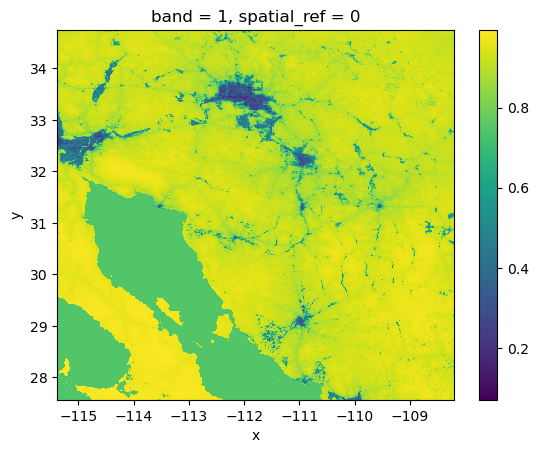

In [7]:
#access raster
bio_index_2017 = rioxr.open_rasterio(item_2017.assets['data'].href)
bio_index_2017
#exploratory plot
bio_index_2017.plot()

There are 1 items in the search.


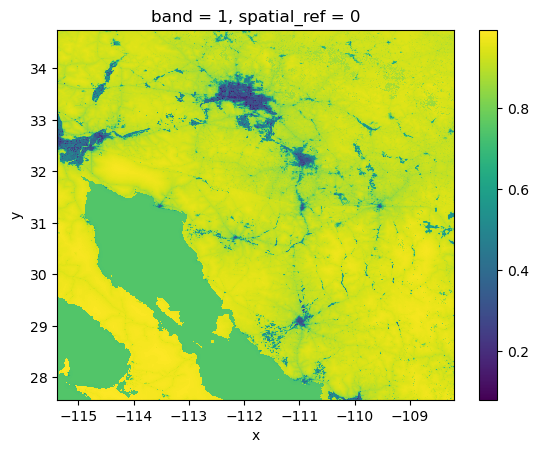

In [8]:
#access 2020 raster
# search 
search_2020 = catalog.search(
    collections=["io-biodiversity"], 
    bbox=bbox, 
    datetime='2020'
)

# get items from search
items_2020 = search_2020.item_collection()
print(f'There are {len(items_2020)} items in the search.')

#check collection asset
biodiversity_collection_2020 = catalog.get_child('io-biodiversity')
biodiversity_collection_2020

#check asset of item
item_2020 = items_2020[0]
item_2020.assets

#access raster
bio_index_2020 = rioxr.open_rasterio(item_2020.assets['data'].href)
bio_index_2020
#exploratory plot
bio_index_2020.plot()

In [9]:
#load in arizona counties datas
arizona = gpd.read_file('data/tl_2022_04_cousub/tl_2022_04_cousub.shp')
arizona.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,NaN,NaN,NaN,S,12231052883,44653332,+35.1066114,-111.3662497,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,NaN,NaN,NaN,S,7228864534,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,NaN,NaN,NaN,S,2342313339,3772690,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,Nogales,Nogales CCD,22,Z5,G4040,NaN,NaN,NaN,S,1762322938,2382710,+31.4956020,-111.0171332,"POLYGON ((-111.36692 31.52136, -111.36316 31.5..."
4,04,023,92550,01934966,0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,NaN,NaN,NaN,S,1439530300,685527,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


<Axes: >

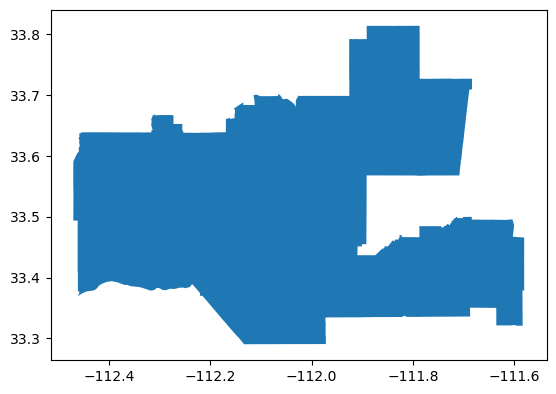

In [10]:
#-----subset to Maricopa County

#use str.to.lower to make column names lowercase
arizona.columns = arizona.columns.str.lower()
arizona.head()

#selecting Maricopa County
phoenix = arizona[arizona['name']=='Phoenix']
phoenix
#Exploratory plot
phoenix.plot()

# 2. Geographic Context

In 2021, Maricopa County, which encompasses the Phoenix Metropolitan area, had the most land development of any US county since 2001 [1](https://www.washingtonpost.com/nation/interactive/2021/land-development-urban-growth-maps/). The county added over 270 sq. miles of developed land which creates pressure on the areas biodiversity and natural landscape. While increased development and urbanization can be necessary to support growing populations within the area, it is important to consider the potential impacts of this expansion on the environment.


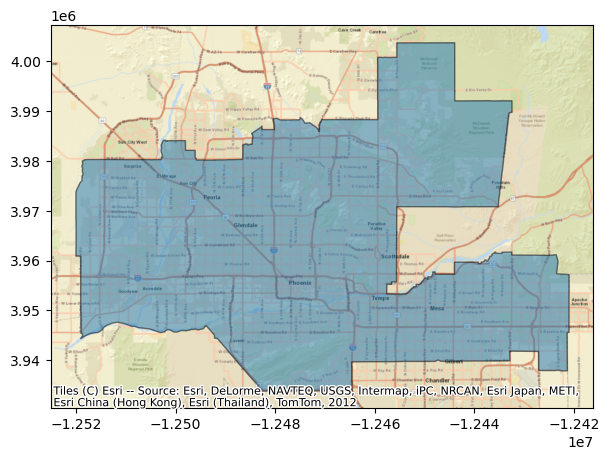

In [11]:
#plot geographic context of phoenix subdivision
# create axis with plot
ax = (phoenix.to_crs(epsg=3857) #3857 is a projected coordinate system used for rendering maps online
      .plot(figsize=(7, 7), alpha=0.5, edgecolor="k")
      )

# add basemap from contextily
# add NatGeo basemap from contextily
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldStreetMap)

# 3. Data Exploration

In [13]:
#show type of bio_index
print(type(bio_index_2017))
#show values of bio_index
bio_index_2017.values
#print bio_index crs
print(bio_index_2017.rio.crs)

#show type of bio_index
print(type(bio_index_2020))
#show values of bio_index
bio_index_2020.values
#print bio_index crs
print(bio_index_2020.rio.crs)

<class 'xarray.core.dataarray.DataArray'>
EPSG:4326
<class 'xarray.core.dataarray.DataArray'>
EPSG:4326


In [14]:
#find type of phoenix dataset
print(type(phoenix))
#check values of phoenix
phoenix.values
#show phoenix crs
print(phoenix.crs)

<class 'geopandas.geodataframe.GeoDataFrame'>
EPSG:4269


## 3.1 Data Transformation

In [21]:
#transform phoenix crs to bio_index crs
phoenix.to_crs(crs = 4326, inplace = True)
#confirm crs transformation
phoenix.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
#remove unecessary band "band" from bio_index datasets
#bio_index_2017 = bio_index_2017.squeeze().drop('band')
#bio_index_2020 = bio_index_2020.squeeze().drop('band')

# 4. Analysis

In [17]:
clip_2017 = (bio_index_2017.rio.clip(phoenix.geometry))
clip_2020 = (bio_index_2020.rio.clip(phoenix.geometry))

In [26]:
type(phoenix)

geopandas.geodataframe.GeoDataFrame

In [31]:
phoenix_clip2017 = clip_2017>0.75
phoenix_clip2020 = clip_2020>0.75

In [33]:
phoenix_clip2017.astype(int)
phoenix_clip2020.astype(int)

<xarray.DataArray (band: 1, y: 583, x: 990)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -112.5 -112.5 -112.5 ... -111.6 -111.6 -111.6
  * y            (y) float64 33.81 33.81 33.81 33.81 ... 33.29 33.29 33.29 33.29
    spatial_ref  int64 0

In [41]:
bii_2017 = (clip_2017/phoenix_clip2017)*100

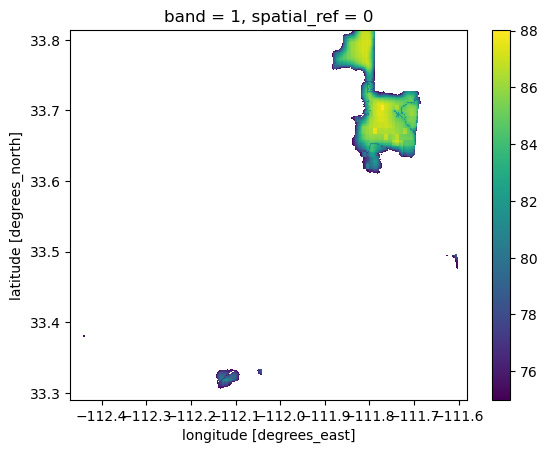

In [42]:
bii_2017.plot()

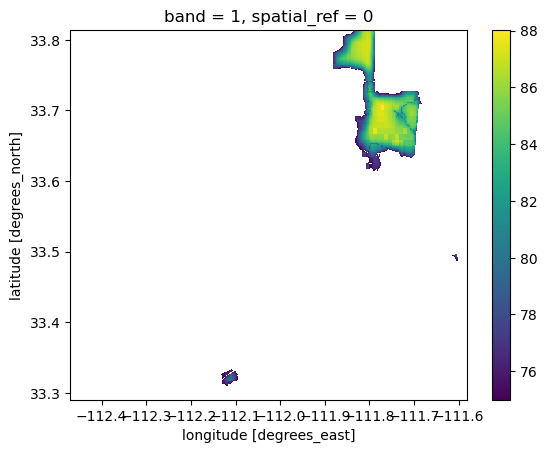

In [44]:
bii_2020 = (clip_2020/phoenix_clip2020)*100
bii_2020.plot()

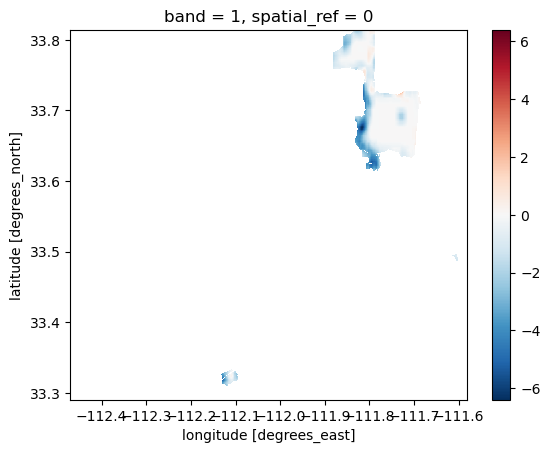

In [52]:
bii_subtract = bii_2020-bii_2017
bii_subtract.plot()

# 5. Final Output

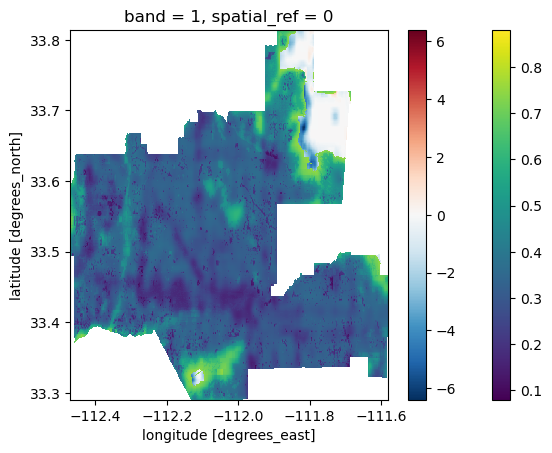

In [53]:
#create plot
fig, ax = plt.subplots()

clip_2020.plot()

bii_subtract.plot()